# HW4 Jiahao Sun 7438675766

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve,auc
from sklearn.metrics import mean_squared_error,f1_score, accuracy_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence as influence
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import os
from itertools import chain
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFECV
from random import sample
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

## 1(a)

In [2]:
attr_name = "../data/communities.names"
attrs = []
with open(attr_name, 'r') as f:
    lines = f.readlines()
    for line in lines:
        if (line.startswith('@attribute')):
            attrs.append(line.split(" ")[1])

In [3]:
lines

['Title: Communities and Crime\n',
 '\n',
 'Abstract: Communities within the United States. The data combines socio-economic data \n',
 'from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime \n',
 'data from the 1995 FBI UCR.\n',
 '\n',
 '-----------------------------------------------------------------------------------------\n',
 '\n',
 'Data Set Characteristics:  Multivariate\n',
 'Attribute Characteristics: Real\n',
 'Associated Tasks: Regression\n',
 'Number of Instances: 1994\n',
 'Number of Attributes: 128\n',
 'Missing Values? Yes\n',
 'Area: Social\n',
 'Date Donated: 2009-07-13\n',
 '\n',
 '-----------------------------------------------------------------------------------------\n',
 '\n',
 'Source:\n',
 '\n',
 "Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle \n",
 'University; Philadelphia, PA, 19141, USA\n',
 '-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law \n',
 'Enforcement Manag

In [4]:
com_data = pd.read_csv("../data/communities.data",header=None,names=attrs,na_values='?')

### Attribute Information: (122 predictive, 5 non-predictive, 1 goal). ['state', 'county', 'community', 'communityname', 'fold'] are 5 non-predictive attributes which should be ignored

In [5]:
com_data = com_data.iloc[:,5:]

In [6]:
com_data_train = com_data.iloc[:1495,:]
com_data_test = com_data.iloc[1495:,:]

In [7]:
com_data_train

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1490         0.07         0.41         0.28         0.23        0.57  ...   
1491         0.42         0.44         0.57         0.40        0.25  ...   
1492         0.01         0.44         0.42         0.27        0.63  ...   
1493         0.01         0.40         0.40         0.24        0.29  ...   
1494         1.00         0.37         0.52         0.33        0.44  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20       0.06           0.04   
1         0.02     0.12            0.45        NaN            NaN   
2         0.01     0.21            0.02        NaN            NaN   
3         0.02     0.39            0.28        NaN            NaN   
4         0.04     0.09            0.02        NaN            NaN   
...        ...      ...             ...        ...            ...   
1490      0.02     0.14            0.22        NaN            NaN   
1491      0.07     0.40            0.14       0.07           0.05   
1492      0.03     0.12            0.01        NaN            NaN   
1493      0.08     0.15            0.02        NaN            NaN   
1494      0.00     1.00            1.00       0.00           0.01   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                    0.90                  0.5                 0.32   
1                     NaN                  NaN                 0.00   
2                     NaN                  NaN                 0.00   
3                     NaN                  NaN                 0.00   
4                     NaN                  NaN                 0.00   
...                   ...                  ...                  ...   
1490                  NaN                  NaN                 0.00   
1491                 0.85                  0.5                 0.61   
1492                  NaN                  NaN                 0.00   
1493                  NaN                  NaN                 0.00   
1494                 0.77                  0.0                 0.51   

      PolicBudgPerPop  ViolentCrimesPerPop  
0                0.14                 0.20  
1                 NaN                 0.67  
2                 NaN                 0.43  
3                 NaN                 0.12  
4                 NaN                 0.03  
...               ...                  ...  
1490              NaN                 0.03  
1491             0.19                 0.20  
1492              NaN                 0.30  
1493              NaN   

## 1(b)

In [8]:
nan_attr = com_data.isnull().sum()
nan_attr[nan_attr>0]

OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64

###  As is shown that there are some features are missed for the majority of samples. As it said in the data description in communities.names, a limitation was that the LEMAS survey was of the police departments with at least 100 officers, plus a random sample of smaller departments. For our purposes, communities not found in both census and crime datasets were omitted. Many communities are missing LEMAS data. Thus, those attributes are missed systematically. I think the proper way is to ignore those features where the missed ones are majority. However, according to the homework requirement, dropping is not an option. I will simple imputer to handle OtherPerCap and use KNN to do the  remaining data imputation. (I assume that it will get better result than just using simple imputer)

In [9]:
####### using mean to impute OtherPerCap #################
OtherPerCap_mean = com_data['OtherPerCap'].mean()

In [10]:
com_data.loc[com_data['OtherPerCap'].isnull()==True,'OtherPerCap'] = OtherPerCap_mean 

In [11]:
# examine after impute OtherPerCap
nan_attr = com_data.isnull().sum()
nan_attr[nan_attr>0]

LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64

In [12]:
#find all the rows which contain NaN.There are 1675 rows
index = com_data.isnull().T.any()
nan_index = index[index==True].index
train_index = index[index==False].index

In [13]:
len(nan_index)

1675

In [14]:
com_data[nan_attr[nan_attr>0].index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LemasSwornFT          319 non-null    float64
 1   LemasSwFTPerPop       319 non-null    float64
 2   LemasSwFTFieldOps     319 non-null    float64
 3   LemasSwFTFieldPerPop  319 non-null    float64
 4   LemasTotalReq         319 non-null    float64
 5   LemasTotReqPerPop     319 non-null    float64
 6   PolicReqPerOffic      319 non-null    float64
 7   PolicPerPop           319 non-null    float64
 8   RacialMatchCommPol    319 non-null    float64
 9   PctPolicWhite         319 non-null    float64
 10  PctPolicBlack         319 non-null    float64
 11  PctPolicHisp          319 non-null    float64
 12  PctPolicAsian         319 non-null    float64
 13  PctPolicMinor         319 non-null    float64
 14  OfficAssgnDrugUnits   319 non-null    float64
 15  NumKindsDrugsSeiz    

###  The type of the attributes which need data imputation are all numeric. Therefore use KNN regressor.

In [15]:
predictors = list(set(com_data.columns)-set(nan_attr[nan_attr>0].index))
len(predictors)

101

In [16]:
responsors = list(nan_attr[nan_attr>0].index)
len(responsors)

22

In [17]:
x_train = com_data.loc[train_index,predictors]
x_train

OtherPerCap  blackPerCap  MedRent  PersPerFam  racePctHisp  \
0            0.36         0.32     0.34        0.35         0.17   
16           0.20         0.23     0.33        0.36         0.06   
20           0.24         0.23     0.40        0.60         0.30   
21           0.28         0.21     0.30        0.47         0.05   
23           0.19         0.16     0.17        0.49         0.06   
...           ...          ...      ...         ...          ...   
1969         0.32         0.31     0.57        0.55         0.26   
1981         0.36         0.42     0.60        0.40         0.04   
1991         0.22         0.25     0.37        0.47         0.25   
1992         0.27         0.29     0.64        0.46         0.10   
1993         0.25         0.32     0.54        0.86         0.77   

      PctWorkMomYoungKids  pctUrban  PopDens  PctRecImmig5  HousVacant  ...  \
0                    0.74      1.00     0.26          0.07        0.21  ...   
16                   0.61      1.00     0.39          0.19        0.22  ...   
20                   0.30      1.00     0.46          0.36        0.15  ...   
21                   0.55      0.99     0.07          0.07        1.00  ...   
23                   0.68      1.00     0.12          0.11        0.09  ...   
...                   ...       ...      ...           ...         ...  ...   
1969                 0.55      1.00     1.00          0.94        1.00  ...   
1981                 0.56      0.96     0.13          0.11        0.06  ...   
1991                 0.38      1.00     0.32          0.09        0.21  ...   
1992                 0.57      1.00     0.38          0.43        0.05  ...   
1993                 0.35      1.00     0.30          0.73        0.12  ...   

      PctSameHouse85  MedOwnCostPctIncNoMtg  PctBSorMore  PctOccupMgmtProf  \
0               0.50                   0.25         0.48              0.52   
16              0.41                   0.40         0.47              0.53   
20              0.31                   0.21         0.24              0.36   
21              0.45                   0.32         0.28              0.38   
23              0.58                   0.43         0.27              0.33   
...              ...                    ...          ...               ...   
1969            0.48                   0.24         0.57              0.57   
1981            0.69                   0.58         0.52              0.58   
1991            0.61                   0.53         0.21              0.32   
1992            0.54                   0.40         0.42              0.48   
1993            0.34                   0.21         0.16              0.24   

      PctRecImmig10  PctRecentImmig  PersPerRentOccHous  PctBornSameState  \
0              0.08            0.07                0.28              0.42   
16             0.18            0.21                0.22              0.80   
20             0.42            0.28                0.60              0.58   
21             0.08            0.07                0.40              0.44   
23             0.10            0.11                0.35              0.72   
...             ...             ...                 ...               ...   
1969           1.00            0.96                0.26              0.30   
1981           0.12            0.10                0.20              0.67   
1991           0.12            0.07                0.37              0.68   
1992           0.38            0.42                0.26              0.64   
1993           0.75            0.68                0.89              0.50   

      MalePctDivorce  PctPopUnderPov  
0               0.68            0.19  
16              0.50            0.48  
20              0.60            0.34  
21              0.69            0.33  
23              0.48            0.36  
...              ...             ...  
1969            0.55            0.33  
1981            0.28            0.10  
1991            0.50       

In [18]:
### KNN for all the attributes that need data imputation  ####
for attr in responsors:
    x_train = com_data.loc[train_index,predictors]
    y_train = com_data.loc[train_index,attr]
    neigh = KNeighborsRegressor(n_neighbors=5,p=2,metric = 'euclidean')
    x_train = x_train.values.tolist()
    y_train = y_train.values.flatten().tolist() 
    neigh.fit(x_train, y_train)
    com_data.loc[nan_index,attr] = com_data.apply(lambda row : neigh.predict(row[predictors].values.reshape(1, -1).tolist())[0], axis=1)

In [19]:
com_data

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20      0.060          0.040   
1         0.02     0.12            0.45      0.124          0.050   
2         0.01     0.21            0.02      0.172          0.038   
3         0.02     0.39            0.28      0.088          0.016   
4         0.04     0.09            0.02      0.044          0.020   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05      0.042          0.024   
1990      0.02     0.37            0.20      0.126          0.092   
1991      0.08     0.32            0.18      0.080          0.060   
1992      0.03     0.38            0.33      0.020          0.020   
1993      0.11     0.30            0.05      0.080          0.040   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                   0.900                  0.5                 0.32   
1                   0.832                  0.5                 0.00   
2                   0.680                  0.7                 0.00   
3                   0.802                  0.4                 0.00   
4                   0.708                  0.0                 0.00   
...                   ...                  ...                  ...   
1989                0.752                  0.3                 0.00   
1990                0.624                  0.7                 0.00   
1991                0.780                  0.0                 0.91   
1992                0.790                  0.0                 0.22   
1993                0.730                  0.5                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
0               0.140                 0.20  
1               0.244                 0.67  
2               0.294                 0.43  
3               0.106                 0.12  
4               0.332                 0.03  
...               ...                  ...  
1989            0.130                 0.09  
1990            0.230                 0.45  
1991            0.280                 0.23  
1992            0.180   

In [20]:
nan_attr = com_data.isnull().sum()
nan_attr[nan_attr>0]

Series([], dtype: int64)

In [21]:
##split train and test again
com_data_train = com_data.iloc[:1495,:]
com_data_test = com_data.iloc[1495:,:]

In [22]:
com_data_train

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1490         0.07         0.41         0.28         0.23        0.57  ...   
1491         0.42         0.44         0.57         0.40        0.25  ...   
1492         0.01         0.44         0.42         0.27        0.63  ...   
1493         0.01         0.40         0.40         0.24        0.29  ...   
1494         1.00         0.37         0.52         0.33        0.44  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20      0.060          0.040   
1         0.02     0.12            0.45      0.124          0.050   
2         0.01     0.21            0.02      0.172          0.038   
3         0.02     0.39            0.28      0.088          0.016   
4         0.04     0.09            0.02      0.044          0.020   
...        ...      ...             ...        ...            ...   
1490      0.02     0.14            0.22      0.026          0.016   
1491      0.07     0.40            0.14      0.070          0.050   
1492      0.03     0.12            0.01      0.152          0.040   
1493      0.08     0.15            0.02      0.052          0.022   
1494      0.00     1.00            1.00      0.000          0.010   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                   0.900                  0.5                 0.32   
1                   0.832                  0.5                 0.00   
2                   0.680                  0.7                 0.00   
3                   0.802                  0.4                 0.00   
4                   0.708                  0.0                 0.00   
...                   ...                  ...                  ...   
1490                0.762                  0.2                 0.00   
1491                0.850                  0.5                 0.61   
1492                0.794                  0.8                 0.00   
1493                0.718                  0.2                 0.00   
1494                0.770                  0.0                 0.51   

      PolicBudgPerPop  ViolentCrimesPerPop  
0               0.140                 0.20  
1               0.244                 0.67  
2               0.294                 0.43  
3               0.106                 0.12  
4               0.332                 0.03  
...               ...                  ...  
1490            0.200                 0.03  
1491            0.190                 0.20  
1492            0.306                 0.30  
1493            0.324   

In [23]:
com_data_test

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1495        0.00           0.20          0.03          0.91          0.23   
1496        0.00           0.55          0.13          0.78          0.15   
1497        0.00           0.52          0.04          0.59          0.05   
1498        0.04           0.51          0.07          0.92          0.09   
1499        0.03           0.59          0.20          0.75          0.19   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
1495         0.05         0.15         0.19         0.09        0.42  ...   
1496         0.36         0.48         0.53         0.30        0.10  ...   
1497         0.62         0.84         0.78         0.75        0.43  ...   
1498         0.03         0.38         0.47         0.27        0.35  ...   
1499         0.10         0.38         0.62         0.35        0.11  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
1495      0.01     0.23            0.73      0.018          0.020   
1496      0.01     0.18            0.02      0.074          0.028   
1497      0.01     0.18            0.00      0.128          0.022   
1498      0.06     0.13            0.16      0.034          0.018   
1499      0.03     0.23            0.06      0.070          0.030   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05      0.042          0.024   
1990      0.02     0.37            0.20      0.126          0.092   
1991      0.08     0.32            0.18      0.080          0.060   
1992      0.03     0.38            0.33      0.020          0.020   
1993      0.11     0.30            0.05      0.080          0.040   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
1495                0.814                  0.6                 0.00   
1496                0.676                  0.5                 0.00   
1497                0.648                  0.5                 0.00   
1498                0.820                  0.0                 0.00   
1499                0.554                  0.4                 0.00   
...                   ...                  ...                  ...   
1989                0.752                  0.3                 0.00   
1990                0.624                  0.7                 0.00   
1991                0.780                  0.0                 0.91   
1992                0.790                  0.0                 0.22   
1993                0.730                  0.5                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
1495            0.216                 0.12  
1496            0.288                 0.11  
1497            0.106                 0.12  
1498            0.152                 0.06  
1499            0.256                 0.12  
...               ...                  ...  
1989            0.130                 0.09  
1990            0.230                 0.45  
1991            0.280                 0.23  
1992            0.180   

## 1(c)

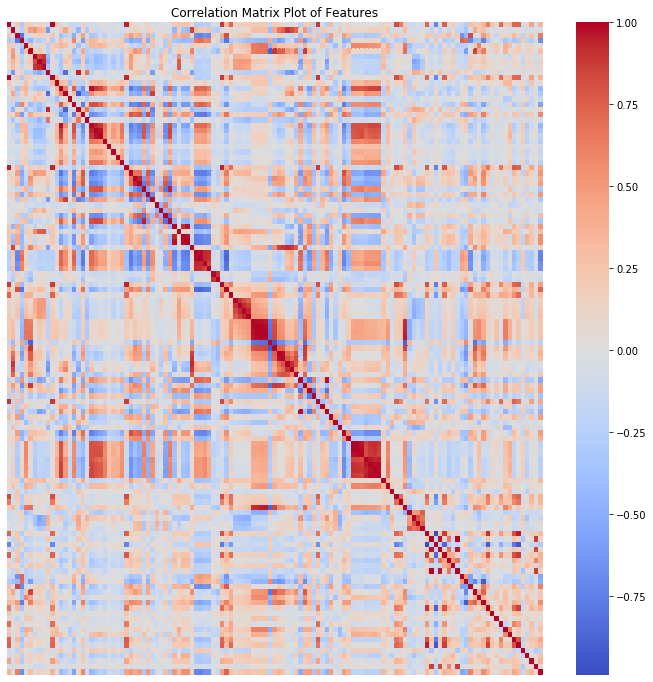

In [24]:
# plot on entire dataset
fit, axes = plt.subplots(figsize=(12, 12))
sns.heatmap(com_data.corr(), cmap='coolwarm',
            xticklabels=False, yticklabels=False, ax=axes)
plt.title("Correlation Matrix Plot of Features")
plt.show()

## 1(d)

In [25]:
coef_of_vari = com_data.apply(lambda col : col.std() / col.mean(), axis=0)
print(coef_of_vari)

population             2.203503
householdsize          0.353298
racepctblack           1.410920
racePctWhite           0.323782
racePctAsian           1.359162
                         ...   
LemasPctPolicOnPatr    0.163771
LemasGangUnitDeploy    0.642966
LemasPctOfficDrugUn    2.555266
PolicBudgPerPop        0.527806
ViolentCrimesPerPop    0.979015
Length: 123, dtype: float64


## 1(e)

In [26]:
num_features = int(np.floor(np.sqrt(128)))
highCVfeats = coef_of_vari.sort_values(ascending=False)[:num_features]
highCVfeats

NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
NumUnderPov            2.304970
population             2.203503
numbUrban              2.001744
LemasSwornFT           1.978985
HousVacant             1.958780
PctPolicAsian          1.757949
dtype: float64

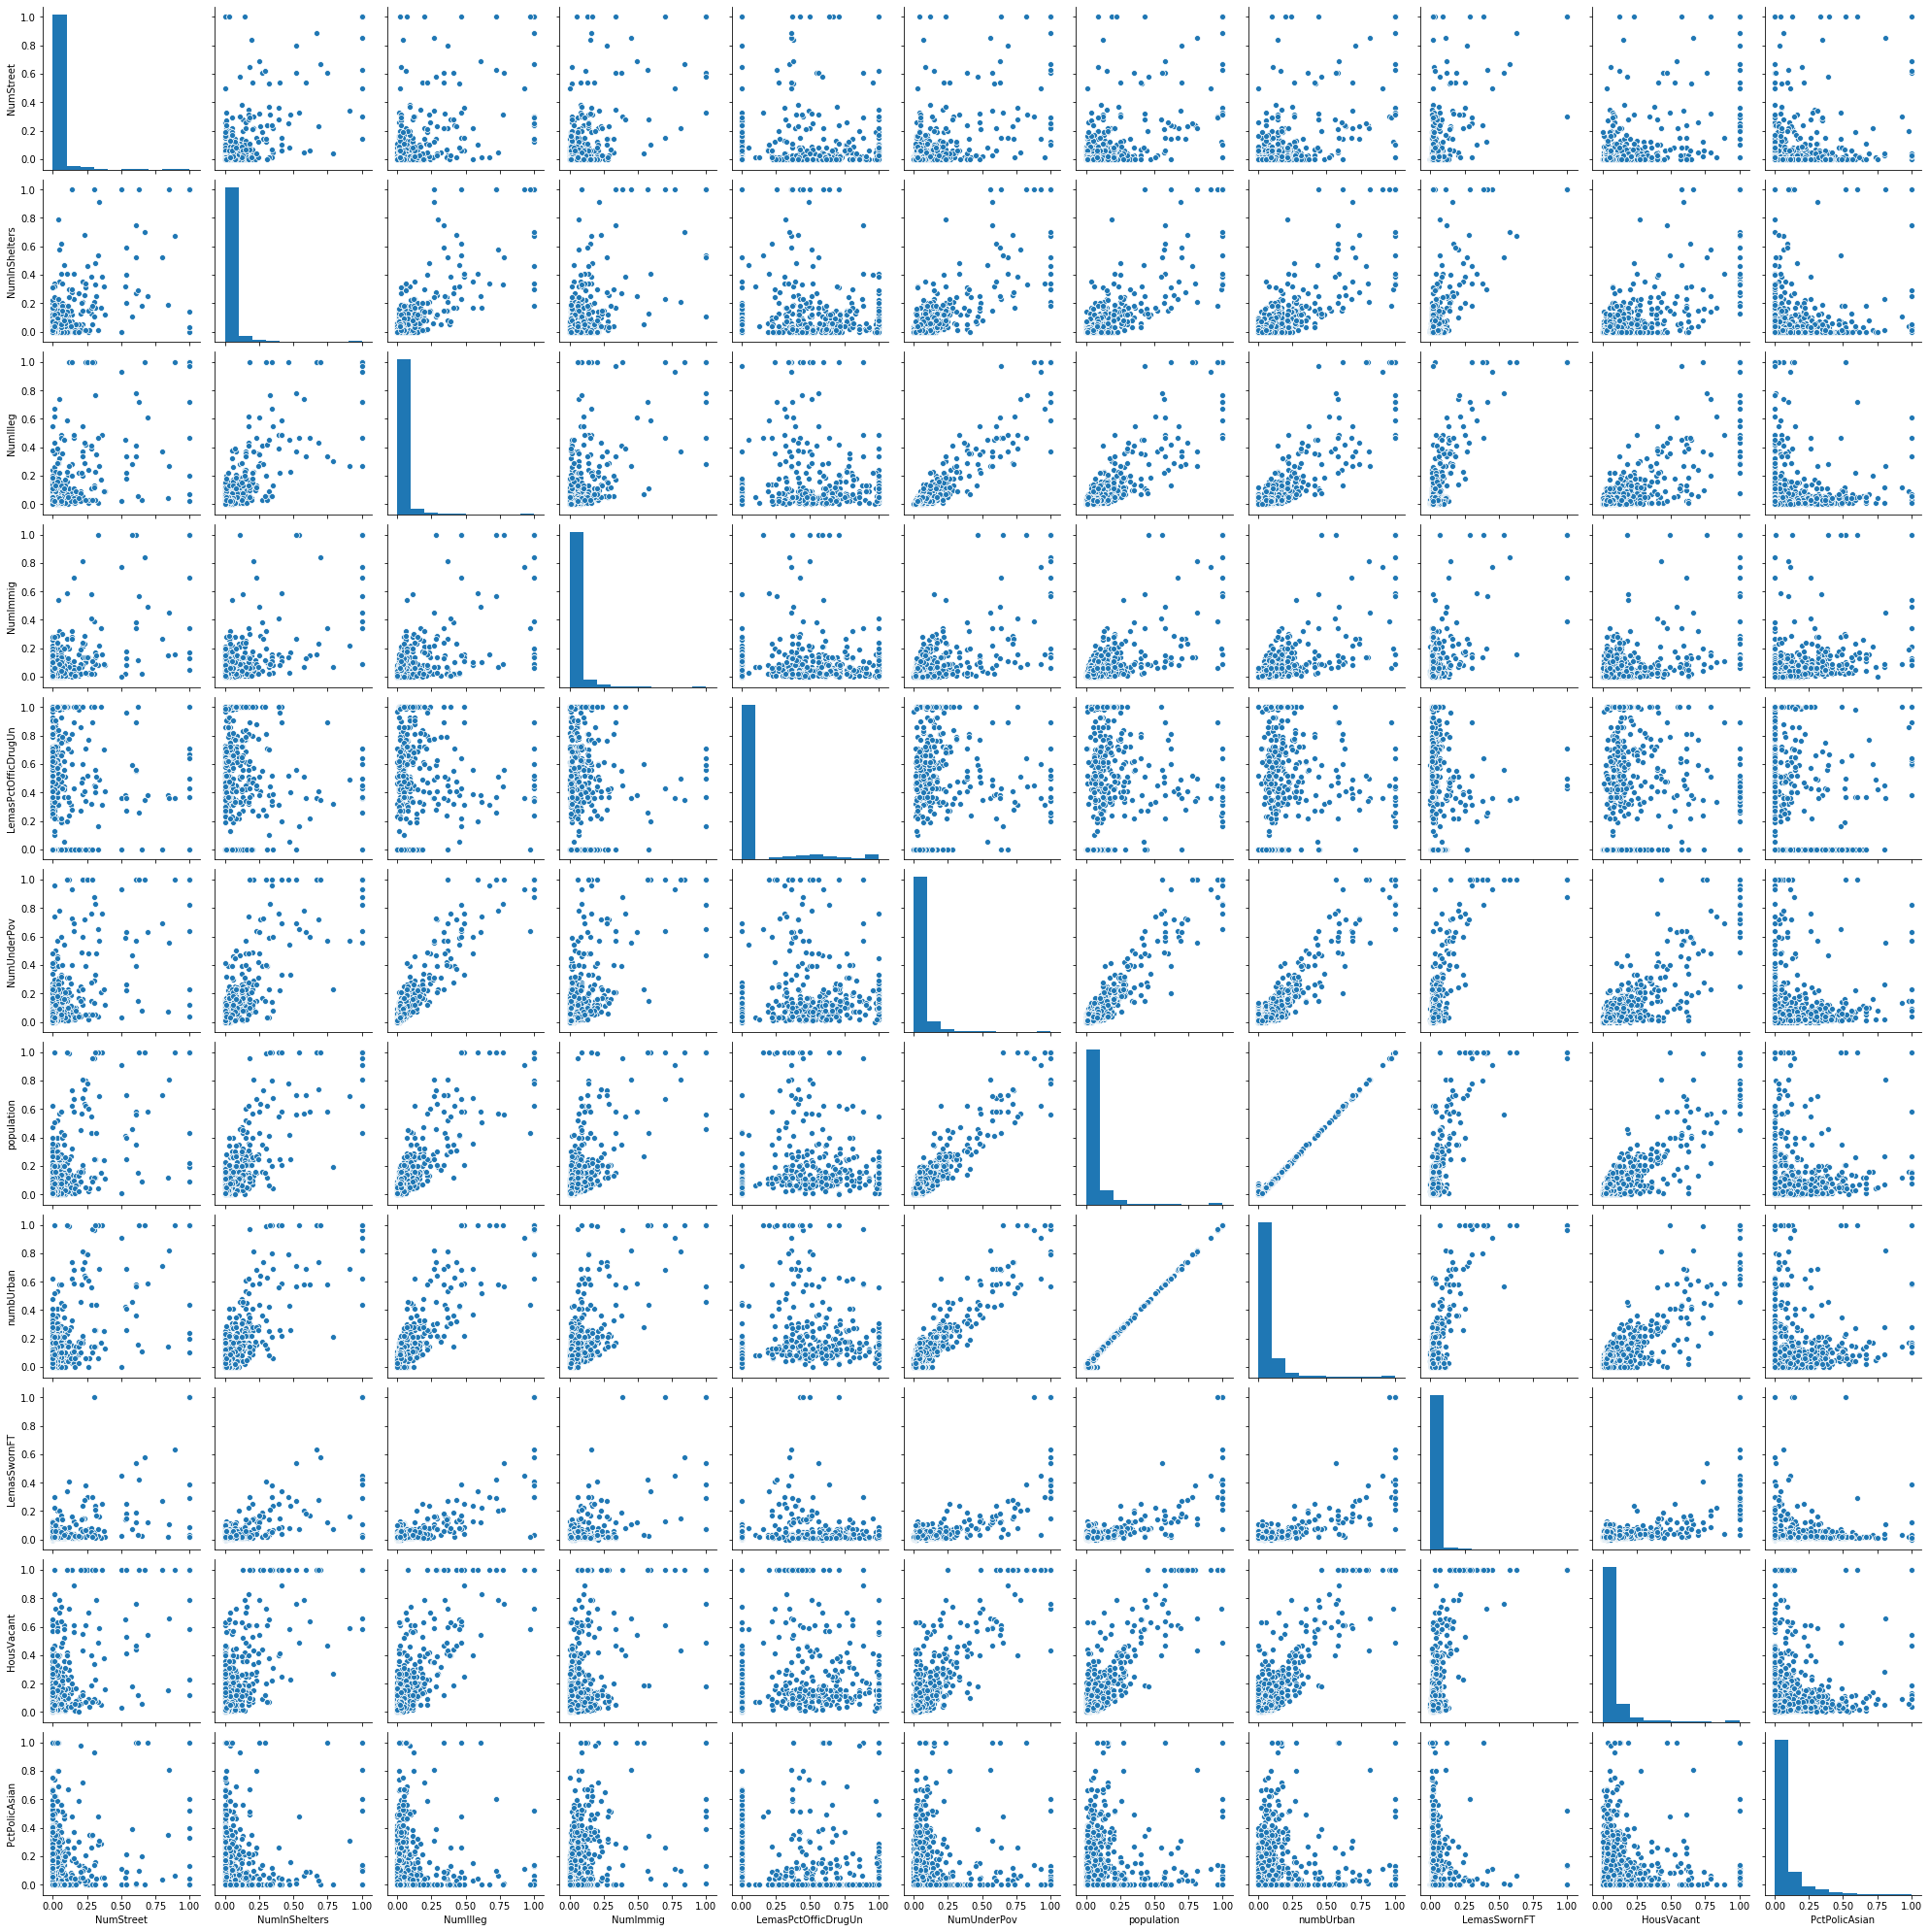

In [27]:
selected_cols = highCVfeats.index
sns.pairplot(com_data[selected_cols])
plt.show()

### It's hard to draw a conclusion of significance of those features just by scatter plots.

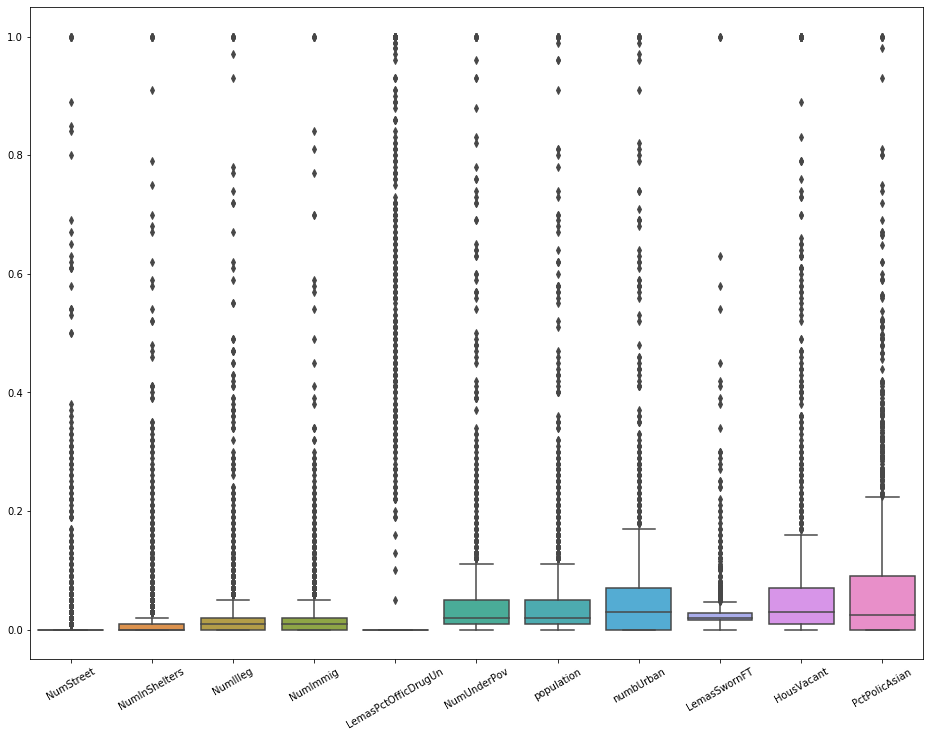

In [28]:
fig, axes = plt.subplots(figsize=(16, 12))
sns.boxplot(data=com_data[selected_cols], ax=axes)
plt.xticks(rotation=30)
plt.show()

## 1(f)

In [29]:
x_train = com_data_train.iloc[:, :-1]
y_train = com_data_train.iloc[:, -1]
x_test= com_data_test.iloc[:, :-1]
y_test= com_data_test.iloc[:, -1]

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
test_pred = reg.predict(x_test)
test_mse = mean_squared_error(y_test, test_pred)
print("OLS Linear Regression's test MSE:", test_mse)

OLS Linear Regression's test MSE: 0.017048511746581157


## 1(g)

In [30]:
# create k-fold and alpha options
splitter = KFold(5, shuffle=True, random_state=1495)
alphas = [10 ** i for i in range(-5, 6)]

# create ridge model
ridge_reg = linear_model.RidgeCV(alphas=alphas, 
                      cv=splitter, 
                      scoring='neg_mean_squared_error')
ridge_reg.fit(x_train, y_train)
print("Choose alpha = {}".format(ridge_reg.alpha_))

Choose alpha = 1.0


In [31]:
test_pred = ridge_reg.predict(x_test)
test_mse = mean_squared_error(y_test, test_pred)
print("Ridge Regression's test MSE:", test_mse)

Ridge Regression's test MSE: 0.016979219333064385


### 1(h)

In [38]:
# Lasso without standardization
lasso_reg = linear_model.LassoCV(alphas=alphas, 
                      cv=splitter)
lasso_reg.fit(x_train, y_train)
print("Choose alpha = {}".format(lasso_reg.alpha_))

Choose alpha = 0.0001


In [39]:
test_pred = lasso_reg.predict(x_test)
test_mse = mean_squared_error(y_test, test_pred)
print("Without standardization, Lasso Regression's test MSE:", test_mse)
selected_feature = pd.Series(data=lasso_reg.coef_[lasso_reg.coef_!=0],
                                  index=x_test.columns[lasso_reg.coef_!=0])
print(selected_feature)

Without standardization, Lasso Regression's test MSE: 0.017158623626037837
racepctblack           0.182639
racePctWhite           0.028481
racePctAsian          -0.040313
racePctHisp            0.020813
agePct12t21            0.046424
                         ...   
PolicCars              0.054330
LemasPctPolicOnPatr   -0.027863
LemasGangUnitDeploy    0.022863
LemasPctOfficDrugUn   -0.000382
PolicBudgPerPop        0.014271
Length: 81, dtype: float64


In [65]:
#Min-Max Normalization
x_train_np = x_train.values
x_test_np = x_test.values
colname = list(x_train.columns)
min_max_scaler = preprocessing.MinMaxScaler() 
x_train_norm = min_max_scaler.fit(x_train_np)
x_test_norm = min_max_scaler.fit(x_test_np)
x_train_norm = min_max_scaler.transform(x_train_np)
x_test_norm = min_max_scaler.transform(x_test_np)
x_train_norm = pd.DataFrame(x_train_norm,columns=colname)
x_test_norm = pd.DataFrame(x_test_norm,columns=colname)

In [49]:
# repeat Lasso 
lasso_reg_v2 = linear_model.LassoCV(alphas=alphas, 
                      cv=splitter)
lasso_reg_v2.fit(x_train_norm, y_train)
print("Choose alpha = {}".format(lasso_reg_v2.alpha_))

Choose alpha = 0.0001


In [50]:
test_pred_v2 = lasso_reg_v2.predict(x_test_norm)
test_mse_v2 = mean_squared_error(y_test, test_pred_v2)
print("With normalization, Lasso Regression's test MSE:", test_mse_v2)
selected_feature_v2 = pd.Series(data=lasso_reg_v2.coef_[lasso_reg_v2.coef_!=0],
                                  index=x_test_norm.columns[lasso_reg_v2.coef_!=0])
print(selected_feature_v2)

With normalization, Lasso Regression's test MSE: 0.017126420974952327
racepctblack           0.180993
racePctWhite           0.028465
racePctAsian          -0.039879
racePctHisp            0.018665
agePct12t21            0.045311
                         ...   
PctUsePubTrans        -0.047227
PolicCars              0.057771
PolicOperBudg          0.076890
LemasPctPolicOnPatr   -0.027847
LemasGangUnitDeploy    0.022375
Length: 82, dtype: float64


## 1(i)

In [51]:
def PCRCV(train_X, train_Y, fold, dim):
    valid_err = 0
    #k-fold cross validation 
    splitter = KFold(fold, shuffle=True, random_state=1495)
    for train_idx, valid_idx in splitter.split(train_X):
        # split
        cur_trainX = train_X.iloc[train_idx, :]
        cur_trainY = train_Y.iloc[train_idx]
        cur_validX = train_X.iloc[valid_idx, :]
        cur_validY = train_Y.iloc[valid_idx]
        # perform PCA
        pca = PCA(n_components=dim).fit(cur_trainX)
        pca_trainX = pca.transform(cur_trainX)
        pca_validX = pca.transform(cur_validX)
        # ordinary leaste square regression using data after PCA
        PCAreg = linear_model.LinearRegression()
        PCAreg.fit(pca_trainX, cur_trainY)
        valid_pred = PCAreg.predict(pca_validX)
        valid_mse = mean_squared_error(cur_validY, valid_pred)
        #print("OLS Linear Regression's validation MSE:", test_mse)
        valid_err += valid_mse
    return valid_err / fold

In [52]:
avg_mse = []
for m in range(1, len(x_train.columns) + 1):
    valid_mse = PCRCV(x_train,y_train, 5, m)
    avg_mse.append((m, valid_mse))

# sort the list and get the minimum validation error
avg_mse.sort(key=lambda x: x[1])
print("When M = {}, the validation mse reach minimum of {}.".format(avg_mse[0][0],
                                                               avg_mse[0][1]))

When M = 103, the validation mse reach minimum of 0.019012553200934184.


In [53]:
# using best M
pca = PCA(n_components=103).fit(x_train)
pca_trainX = pca.transform(x_train)
pca_testX = pca.transform(x_test)

# linear regression with PCA results
PCAreg = linear_model.LinearRegression().fit(pca_trainX, y_train)
test_pred = PCAreg.predict(pca_testX)
test_mse = mean_squared_error(y_test, test_pred)
print("PCR model's test MSE:", test_mse)

PCR model's test MSE: 0.017508987095084912


## 1(j)

In [55]:
avg_valid_mse = []
alphas = [10 ** i for i in range(-10, 11)]
splitter = KFold(5, shuffle=True, random_state=1495)

# perform cross-validation to find best alpha
for alpha in alphas:
    xgb_reg= xgb.XGBRegressor(objective="reg:squarederror", reg_alpha=alpha)
    cv_xgb = cross_val_score(xgb_reg, x_train, y_train, cv=splitter, 
                            scoring="neg_mean_squared_error")
    avg_valid_mse.append((alpha, np.abs(cv_xgb.mean())))

avg_valid_mse.sort(key=lambda x: x[1])
print("When alpha = {}, the validation mse reaches minimum of {}.".format(avg_valid_mse[0][0],
                                                               avg_valid_mse[0][1]))

When alpha = 1, the validation mse reaches minimum of 0.02054925315380767.


In [56]:
# xgboost model with best value of alpha
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", reg_alpha=1).fit(x_train, y_train)
test_pred = xgb_reg.predict(x_test)
test_mse = mean_squared_error(y_test, test_pred)
print("XGBoost model's test MSE:", test_mse)

XGBoost model's test MSE: 0.01679904500537098


## 2(a)

In [2]:
data_path_train = '../data/aps_failure_training_set.csv'
data_path_test = '../data/aps_failure_test_set.csv'

aps_train = pd.read_csv(data_path_train, skiprows=20, na_values = 'na')
aps_test = pd.read_csv(data_path_test, skiprows=20, na_values = 'na')
aps_all = pd.concat([aps_train, aps_test])

## 2(b)

### (i)

In [3]:
# create an interative imputer
imp = IterativeImputer(max_iter=5, random_state=0, verbose=2, sample_posterior=True)

aps_x_nan = aps_all.iloc[:, 1:]
aps_x = pd.DataFrame(imp.fit_transform(aps_x_nan), columns=aps_x_nan.columns)

[IterativeImputer] Completing matrix with shape (76000, 170)
[IterativeImputer] Ending imputation round 1/5, elapsed time 105.88
[IterativeImputer] Ending imputation round 2/5, elapsed time 206.32
[IterativeImputer] Ending imputation round 3/5, elapsed time 307.02
[IterativeImputer] Ending imputation round 4/5, elapsed time 407.69
[IterativeImputer] Ending imputation round 5/5, elapsed time 508.86


In [4]:
# check 
nan_attr_aps = aps_x.isnull().sum()
nan_attr_aps[nan_attr_aps>0]

Series([], dtype: int64)

In [5]:
aps_y = aps_all.iloc[:, 0].reset_index(drop=True)

### (ii)

In [7]:
coef_of_vari = aps_x.apply(lambda col : np.abs(np.std(col) / np.mean(col)), axis=0)
highCV= coef_of_vari.sort_values(ascending=False)
highCV

ae_000    2.582977e+03
ef_000    1.438478e+03
dz_000    1.294839e+03
cs_009    6.017143e+02
eg_000    4.513701e+02
              ...     
cs_006    2.122561e+00
bs_000    1.092942e+00
ca_000    9.476333e-01
cb_000    9.421341e-01
cd_000    4.635943e-13
Length: 170, dtype: float64

### (iii)

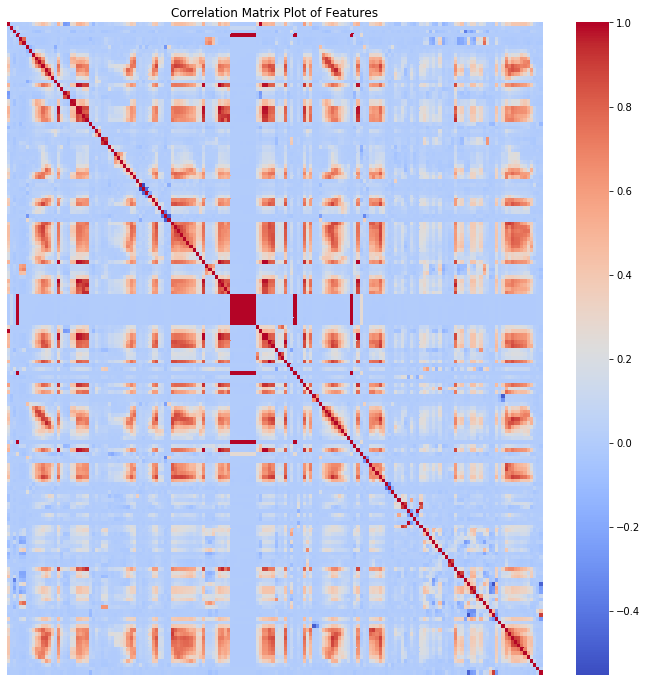

In [8]:
fit, axes = plt.subplots(figsize=(12, 12))
sns.heatmap(aps_x.corr(), cmap='coolwarm',
            xticklabels=False, yticklabels=False, ax=axes)
plt.title("Correlation Matrix Plot of Features")
plt.show()

### (iv)

In [9]:
num_feature = int(np.floor(np.sqrt(170)))
selected = coef_of_vari.sort_values(ascending=False)[:num_feature]
selected

ae_000    2582.977316
ef_000    1438.478414
dz_000    1294.839262
cs_009     601.714251
eg_000     451.370149
cn_000     412.637396
ea_000     385.722628
ch_000     382.240060
az_009     379.577060
af_000     348.606385
ag_000     245.217585
cy_000     222.014758
cf_000     206.914618
dtype: float64

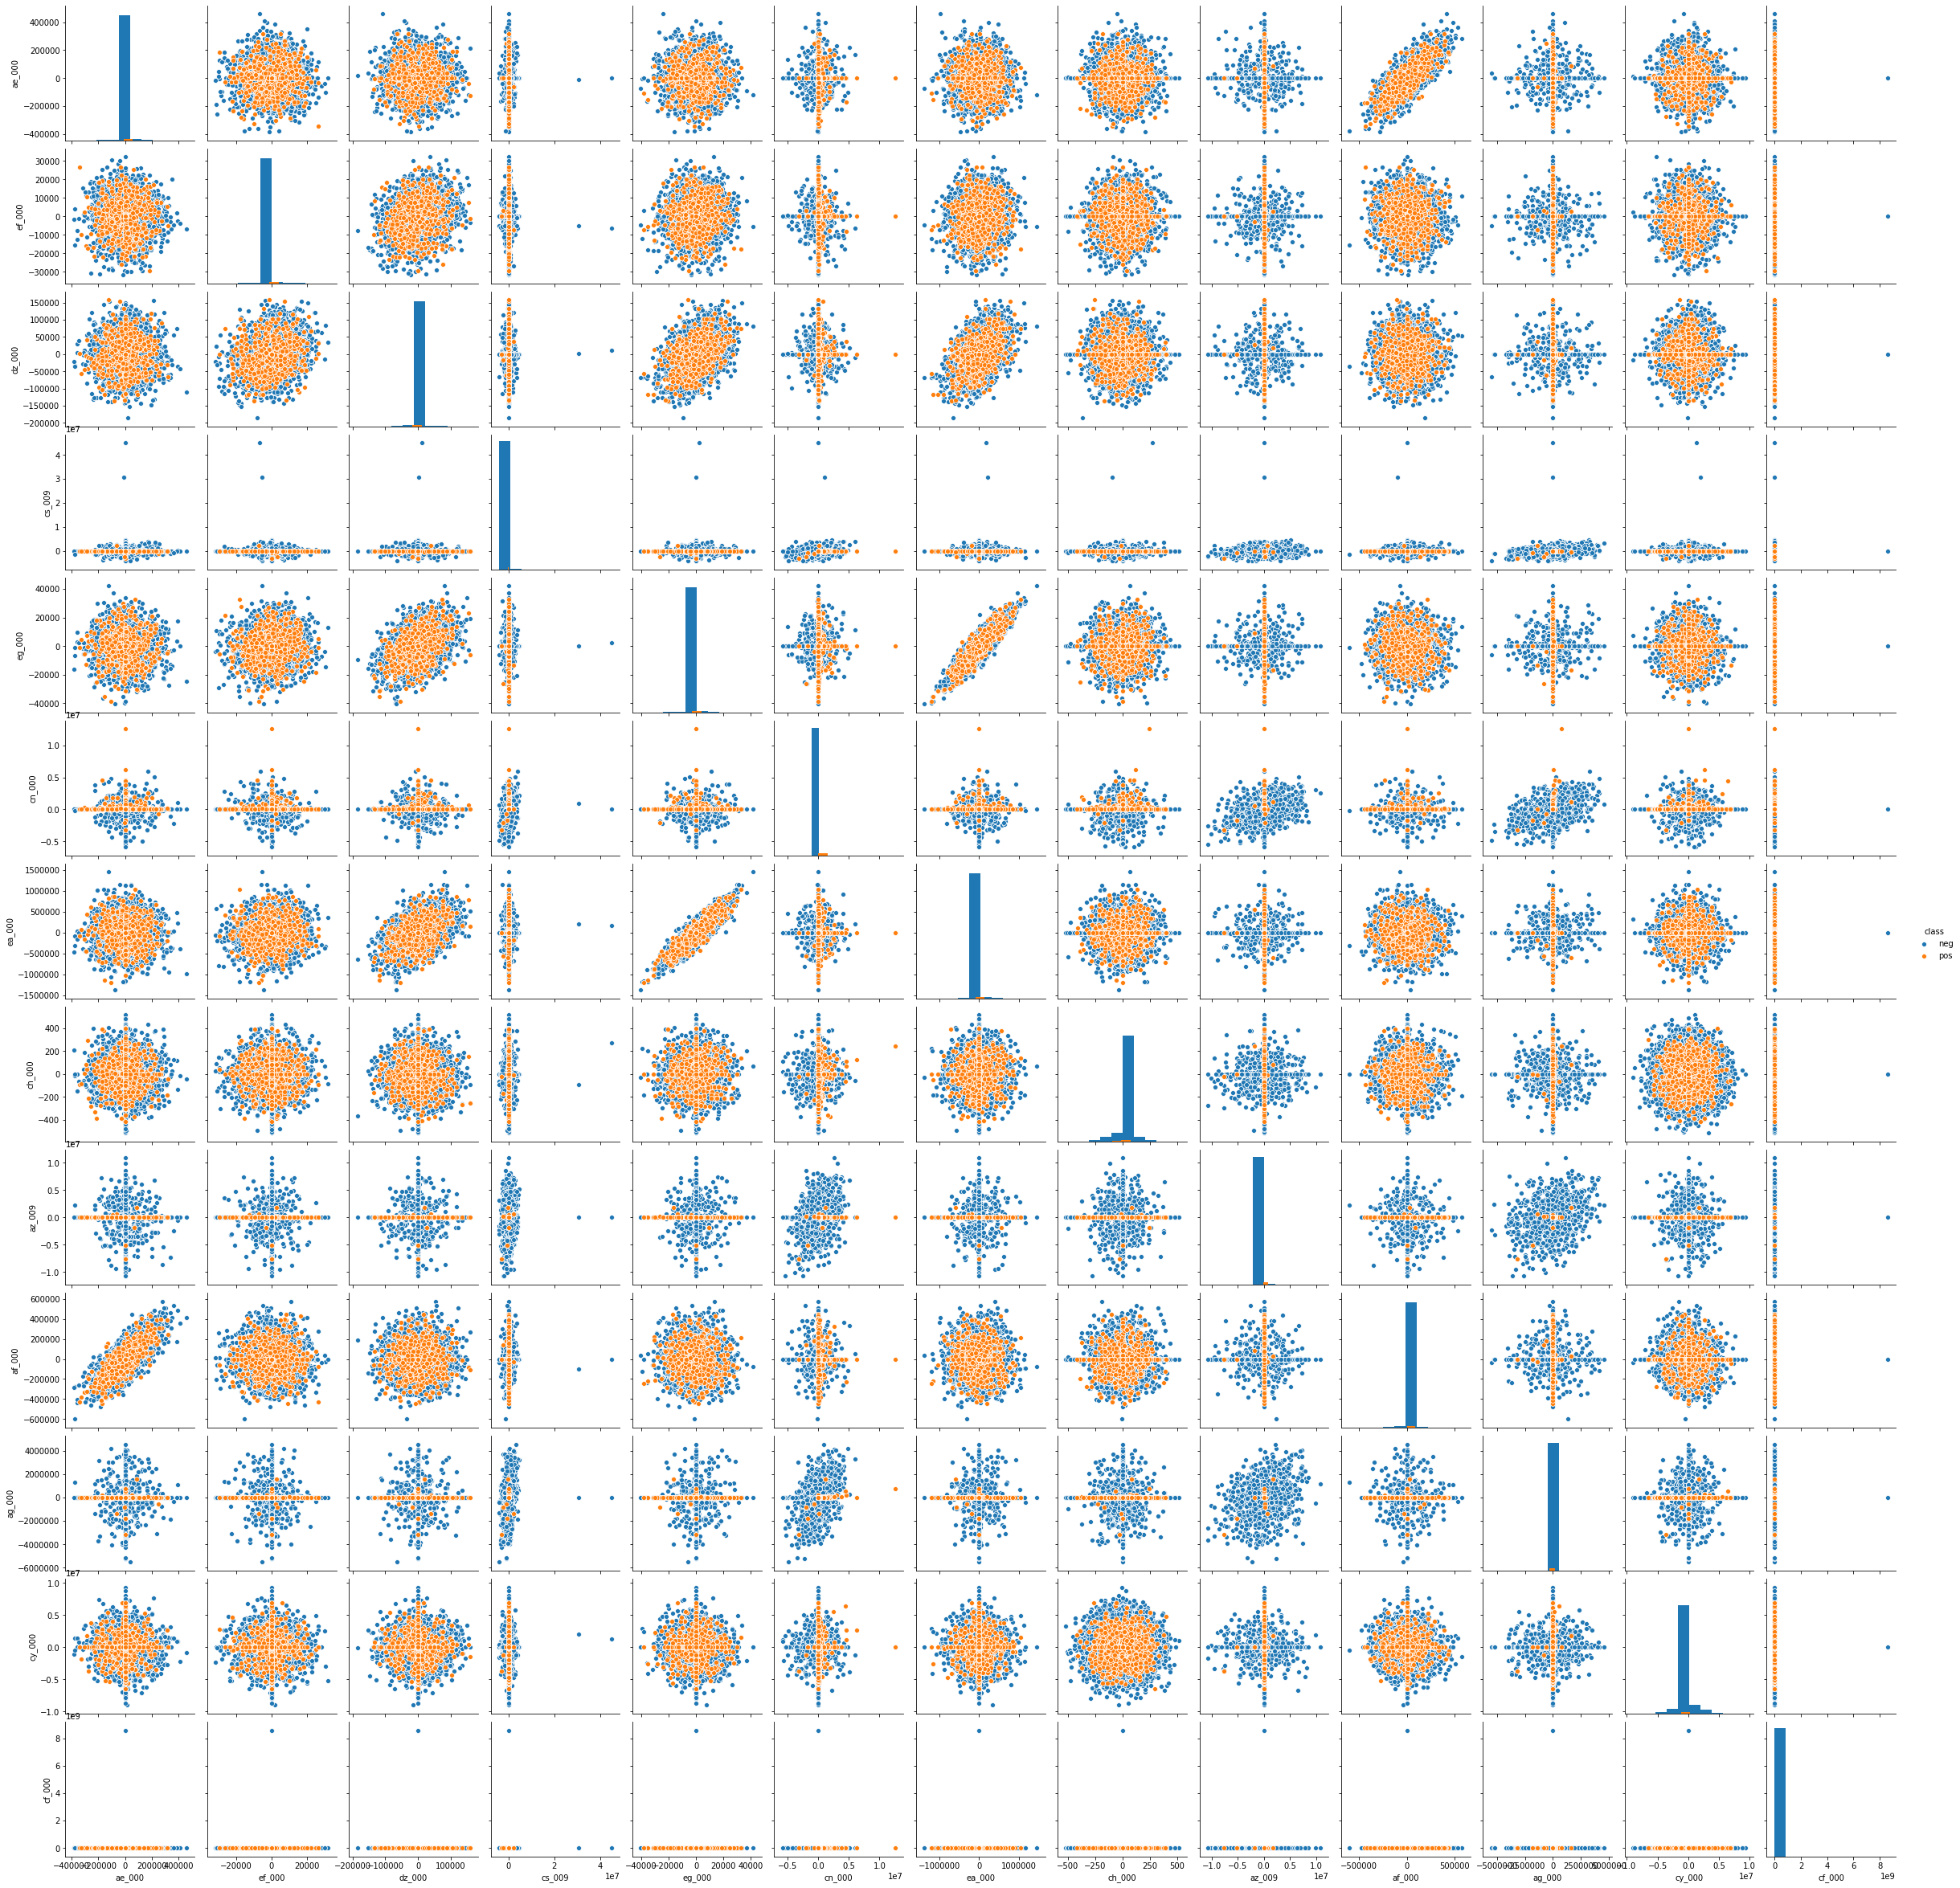

In [10]:
show = aps_x[selected.index]
show_whole = pd.concat([show,aps_y],axis =1)
sns.pairplot(show_whole, hue='class', diag_kind='hist')
plt.show()

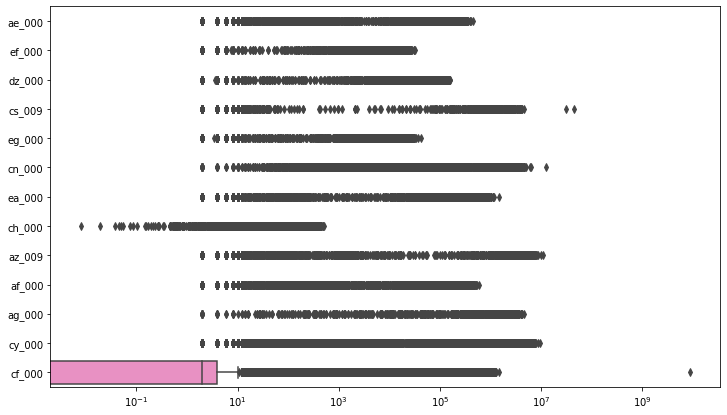

In [11]:
fig, axes = plt.subplots(figsize=(12, 7))
box = sns.boxplot(data=aps_x[selected.index], orient='h', ax=axes)
box.set(xscale="log")
plt.show()

### It's hard to draw a conclusion of significance of those features just by scatter plots.

### (v)

In [12]:
aps_y.value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

### Obviously, the dataset is imbalanced.

## 2(c)

In [6]:
aps_x_train = aps_x.iloc[:60000,:]
aps_x_test = aps_x.iloc[60000:,:]
aps_y_train = aps_y.iloc[:60000]
aps_y_test = aps_y.iloc[60000:]
rf = RandomForestClassifier(max_depth=5, 
                                  random_state=60000, 
                                  verbose=1, 
                                  oob_score=True)
rf.fit(aps_x_train, aps_y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.2s finished


RandomForestClassifier(max_depth=5, oob_score=True, random_state=60000,
                       verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


The confusion for train set is 
[[58979    21]
 [  467   533]]
The classification accuracy is 0.9919


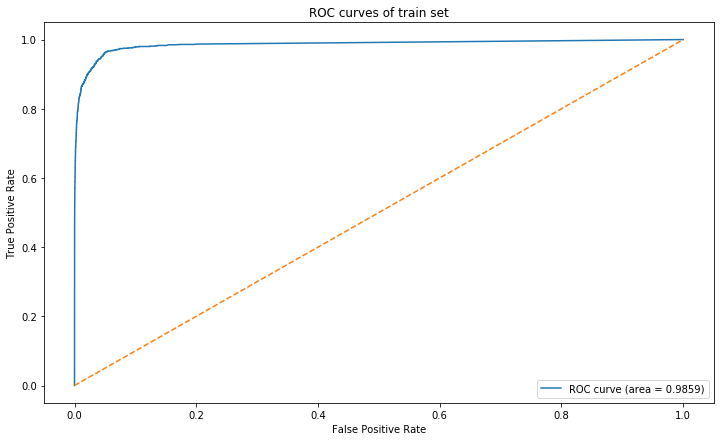

In [7]:
# train set
y_train_predict = rf.predict(aps_x_train)
y_train_prob = rf.predict_proba(aps_x_train)

cm = confusion_matrix(aps_y_train, y_train_predict)
print("The confusion for {} set is \n{}".format('train', cm))
acc = accuracy_score(aps_y_train, y_train_predict)
print("The classification accuracy is %0.4f" % acc)
fpr, tpr, thresholds = roc_curve(aps_y_train, y_train_prob[:, 1], pos_label='pos')
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of {} set".format('train'))
plt.show()

In [8]:
# test set
y_test_predict = rf.predict(aps_x_test)
y_test_prob = rf.predict_proba(aps_x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


The confusion for test set is 
[[15611    14]
 [  188   187]]
The classification accuracy is 0.9874


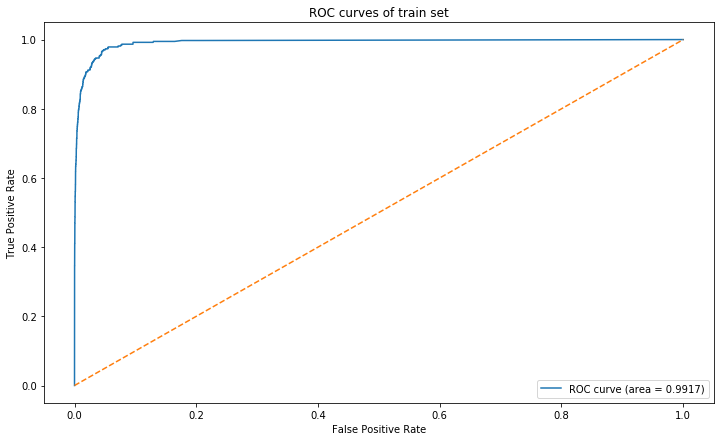

In [9]:
cm = confusion_matrix(aps_y_test, y_test_predict)
print("The confusion for {} set is \n{}".format('test', cm))
acc = accuracy_score(aps_y_test, y_test_predict)
print("The classification accuracy is %0.4f" % acc)
fpr, tpr, thresholds = roc_curve(aps_y_test, y_test_prob[:, 1], pos_label='pos')
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of {} set".format('train'))
plt.show()

In [10]:
trainOOB_err = round(1 - rf.oob_score_, 4)
print("The Out of Bag Error of training set is %.4f"%trainOOB_err)
print("The test Error is %.4f"%round(1 - accuracy_score(aps_y_test, y_test_predict), 4))

The Out of Bag Error of training set is 0.0099
The test Error is 0.0126


## 2(d)

In [32]:
rf_b = RandomForestClassifier(max_depth=5, 
                                  random_state=60000, 
                                  verbose=1, 
                                  oob_score=True,
                                  class_weight='balanced')
rf_b.fit(aps_x_train, aps_y_train)
y_train_predict = rf_b.predict(aps_x_train)
y_train_prob = rf_b.predict_proba(aps_x_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


The confusion for train set is 
[[56513  2487]
 [   29   971]]
The classification accuracy is 0.9581


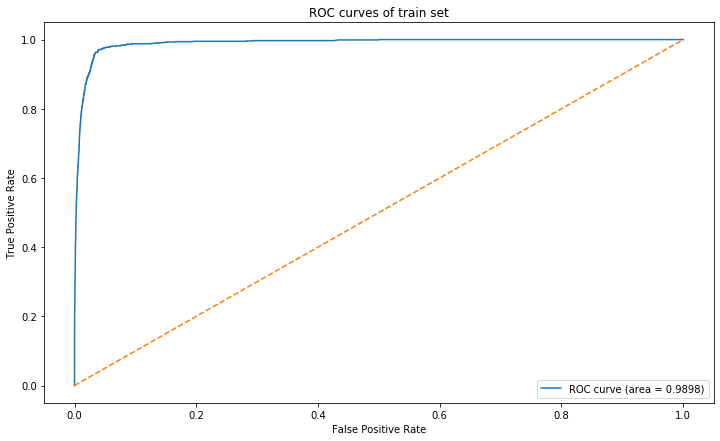

In [33]:
cm = confusion_matrix(aps_y_train, y_train_predict)
print("The confusion for {} set is \n{}".format('train', cm))
acc = accuracy_score(aps_y_train, y_train_predict)
print("The classification accuracy is %0.4f" % acc)
fpr, tpr, thresholds = roc_curve(aps_y_train, y_train_prob[:, 1], pos_label='pos')
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of {} set".format('train'))
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


The confusion for test set is 
[[14989   636]
 [   13   362]]
The classification accuracy is 0.9594


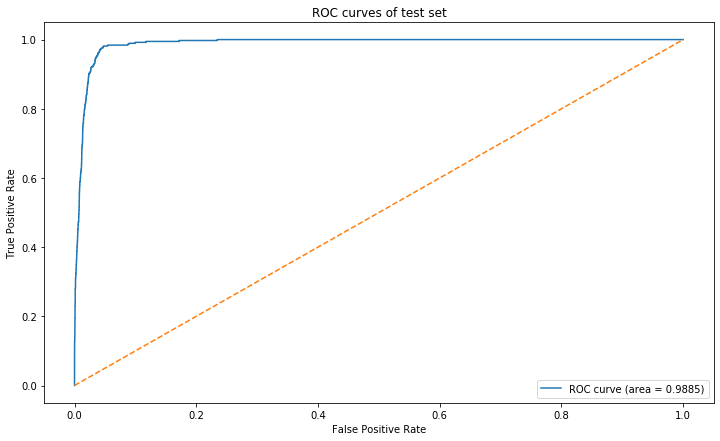

In [34]:
# test set
y_test_predict = rf_b.predict(aps_x_test)
y_test_prob = rf_b.predict_proba(aps_x_test)
cm = confusion_matrix(aps_y_test, y_test_predict)
print("The confusion for {} set is \n{}".format('test', cm))
acc = accuracy_score(aps_y_test, y_test_predict)
print("The classification accuracy is %0.4f" % acc)
fpr, tpr, thresholds = roc_curve(aps_y_test, y_test_prob[:, 1], pos_label='pos')
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of {} set".format('test'))
plt.show()

In [35]:
trainOOB_err = round(1 - rf_b.oob_score_, 4)
print("The Out of Bag Error of training set is %.4f"%trainOOB_err)
print("The test Error is %.4f"%round(1 - accuracy_score(aps_y_test, y_test_predict), 4))

The Out of Bag Error of training set is 0.0431
The test Error is 0.0406


## 2(e)

In [15]:
import weka.core.jvm as jvm
import javabridge
jvm.start()

from weka.classifiers import Classifier, Evaluation
from weka.core.converters import Loader
from weka.core.classes import Random
import weka.plot.classifiers as plcls

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['D:\\Anaconda\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'D:\\Anaconda\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'D:\\Anaconda\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'D:\\Anaconda\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'D:\\Anaconda\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [21]:
# write new csv files for weka model to load
weka_train_path = '../data/weka_train.csv'
weka_test_path = '../data/weka_test.csv'

train_data_weka = pd.concat([aps_x_train,aps_y_train],axis =1)
test_data_weka = pd.concat([aps_x_test,aps_y_test],axis=1)
train_data_weka.to_csv(weka_train_path, index=False)
test_data_weka.to_csv(weka_test_path, index=False)
# load data and specify the column of label
weka_loader = Loader(classname="weka.core.converters.CSVLoader")
weka_train = weka_loader.load_file(weka_train_path)
weka_test = weka_loader.load_file(weka_test_path)
weka_train.class_is_last()
weka_test.class_is_last()

In [22]:
# create LMT model and do 5-fold croos-validation, this section takes extremely long time
lmt = Classifier(classname='weka.classifiers.trees.LMT')
evl = Evaluation(weka_train)
evl.crossvalidate_model(classifier=lmt, data=weka_train, num_folds = 5, rnd=Random(60000))

In [23]:
print(evl.confusion_matrix)

[[58827.   173.]
 [  378.   622.]]


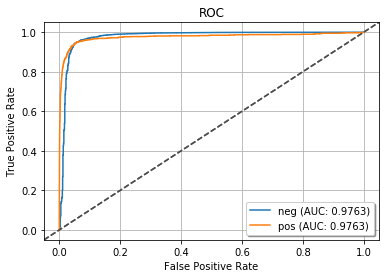

In [24]:
plcls.plot_roc(evl, class_index=[0, 1], wait=True)

In [25]:
print(evl.summary())
print(evl.class_details())


Correctly Classified Instances       59449               99.0817 %
Incorrectly Classified Instances       551                0.9183 %
Kappa statistic                          0.6884
Mean absolute error                      0.0131
Root mean squared error                  0.0847
Relative absolute error                 39.8346 %
Root relative squared error             66.1251 %
Total Number of Instances            60000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.378    0.994      0.997    0.995      0.693    0.976     0.999     neg
                 0.622    0.003    0.782      0.622    0.693      0.693    0.976     0.750     pos
Weighted Avg.    0.991    0.372    0.990      0.991    0.990      0.693    0.976     0.995     



### As is shown in the summary, the train accuracy is 99.0817% and train error rate is 0.9183%.

In [28]:
lmt.build_classifier(weka_train)

The confusion for train set is 
[[58953    47]
 [  223   777]]
The classification accuracy is 0.9955
The train error rate is 0.0045


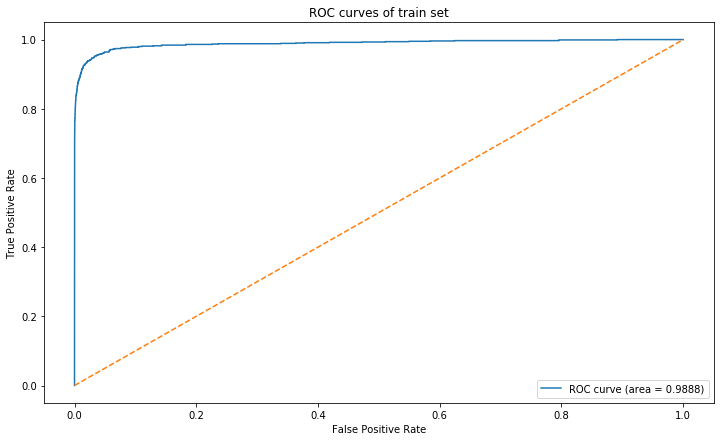

In [37]:
weka_train_predict = []
weka_train_proba = []

# make prediction for each instance
for inst in weka_train:
    weka_train_predict.append(lmt.classify_instance(inst))
    weka_train_proba.append(lmt.distribution_for_instance(inst))

weka_train_predict = np.array(weka_train_predict).astype('str')
weka_train_predict[weka_train_predict == '0.0'] = 'neg'
weka_train_predict[weka_train_predict == '1.0'] = 'pos'
weka_train_proba = np.array(weka_train_proba)

cm = confusion_matrix(aps_y_train, weka_train_predict)
print("The confusion for {} set is \n{}".format('train', cm))
acc = accuracy_score(aps_y_train, weka_train_predict)
print("The classification accuracy is %0.4f" % acc)
print("The train error rate is %0.4f" %(1-acc))
fpr, tpr, thresholds = roc_curve(aps_y_train, weka_train_proba[:, 1], pos_label='pos')
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of {} set".format('train'))
plt.show()

The confusion for test set is 
[[15583    42]
 [  117   258]]
The classification accuracy is 0.9901
The test error rate is 0.0099


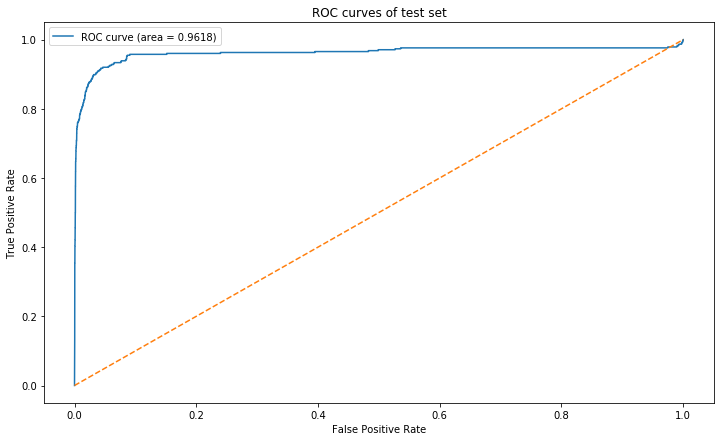

In [30]:
weka_test_predict = []
weka_test_proba = []

# make prediction for each instance
for inst in weka_test:
    weka_test_predict.append(lmt.classify_instance(inst))
    weka_test_proba.append(lmt.distribution_for_instance(inst))

weka_test_predict = np.array(weka_test_predict).astype('str')
weka_test_predict[weka_test_predict == '0.0'] = 'neg'
weka_test_predict[weka_test_predict == '1.0'] = 'pos'
weka_test_proba = np.array(weka_test_proba)

cm = confusion_matrix(aps_y_test, weka_test_predict)
print("The confusion for {} set is \n{}".format('test', cm))
acc = accuracy_score(aps_y_test, weka_test_predict)
print("The classification accuracy is %0.4f" % acc)
print("The test error rate is %0.4f" %(1-acc))
fpr, tpr, thresholds = roc_curve(aps_y_test, weka_test_proba[:, 1], pos_label='pos')
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of {} set".format('test'))
plt.show()

### The 5-fold cross-validation error (99.08%) seems to be slightly better than the test error (99.01%), however, it estimate the test error better than the training error (99.55%).

## 2(f)

In [17]:
valid_err = []
KFold_s = StratifiedKFold(n_splits=5, random_state=60000, shuffle=True)
weka_loader = Loader(classname="weka.core.converters.CSVLoader")
for train_idx, valid_idx in KFold_s.split(aps_x_train, aps_y_train):
    # split
    cur_train_X = aps_x_train.iloc[train_idx, :]
    cur_train_Y = aps_y_train.iloc[train_idx]
    cur_valid_X = aps_x_train.iloc[valid_idx, :]
    cur_valid_Y = aps_y_train.iloc[valid_idx]
    # create smote instance, the right way is to apply smote to train data rather than apply to both
    smote = SMOTE(random_state=10000)
    smote_trainX, smote_trainY = smote.fit_resample(cur_train_X, cur_train_Y)
    train_KF = pd.concat([smote_trainX, smote_trainY],axis =1)
    valid_KF = pd.concat([cur_valid_X,cur_valid_Y],axis=1)
    print('SMOTE done')
    
    # write to file and reload by weka package
    train_path = '../data/tmp_smote_train.csv'
    valid_path = '../data/tmp_smote_valid.csv'
    train_KF.to_csv(train_path, index=False)
    valid_KF.to_csv(valid_path, index=False)
    
    weka_train = weka_loader.load_file(train_path)
    weka_valid = weka_loader.load_file(valid_path)
    weka_train.class_is_last()
    weka_valid.class_is_last()
    # create weka LMT model
    print('Weka Model is training')
    lmt = Classifier(classname='weka.classifiers.trees.LMT')
    lmt.build_classifier(weka_train)
    evl = Evaluation(weka_train)
    evl.test_model(lmt, weka_valid)
    valid_err.append(evl.percent_correct)
    print("Cross Validation {} / 5 finished".format(len(valid_err)))

SMOTE done
Weka Model is training
Cross Validation 1 / 5 finished
SMOTE done
Weka Model is training
Cross Validation 2 / 5 finished
SMOTE done
Weka Model is training
Cross Validation 3 / 5 finished
SMOTE done
Weka Model is training
Cross Validation 4 / 5 finished
SMOTE done
Weka Model is training
Cross Validation 5 / 5 finished


In [26]:
ans = [(100 - err)/100 for err in valid_err]
ans

[0.9814166666666666,
 0.019166666666666714,
 0.024166666666666715,
 0.01683333333333337,
 0.033416666666666685]

In [27]:
print('[5-fold estimator of test error building on SMOTE data]')
round(np.mean(ans), 4)

[5-fold estimator of test error building on SMOTE data]


0.215

In [31]:
# SMOTE on entrie trainning set
smote_weka_trainX, smote_weka_trainY = smote.fit_resample(aps_x_train, aps_y_train)
smote_train_path = '../data/smote_weka_train.csv'
smote_weka_train = pd.concat([smote_weka_trainX, smote_weka_trainY],axis =1)
smote_weka_train.to_csv(smote_train_path, index=False)

In [32]:
weka_train = weka_loader.load_file(smote_train_path)
weka_train.class_is_last()
lmt.build_classifier(weka_train)

The confusion for train set is 
[[57535  1465]
 [  221 58779]]
The classification accuracy is 0.9857
The train error rate is 0.0143


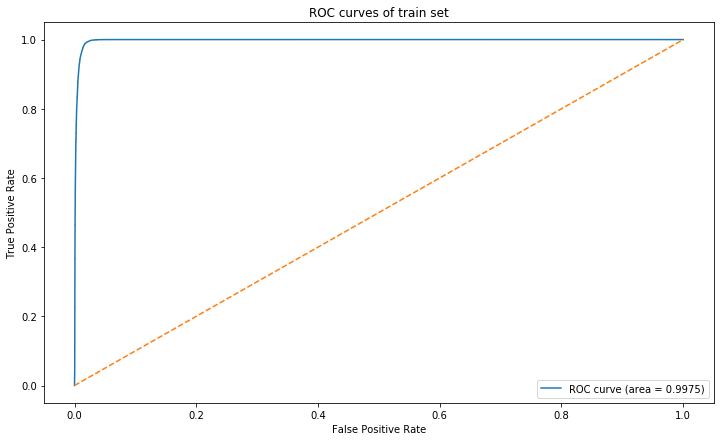

In [34]:
##############  training set #################
weka_train_predict = []
weka_train_proba = []

# make prediction for each instance
for inst in weka_train:
    weka_train_predict.append(lmt.classify_instance(inst))
    weka_train_proba.append(lmt.distribution_for_instance(inst))

weka_train_predict = np.array(weka_train_predict).astype('str')
weka_train_predict[weka_train_predict == '0.0'] = 'neg'
weka_train_predict[weka_train_predict == '1.0'] = 'pos'
weka_train_proba = np.array(weka_train_proba)

cm = confusion_matrix(smote_weka_trainY, weka_train_predict)
print("The confusion for {} set is \n{}".format('train', cm))
acc = accuracy_score(smote_weka_trainY, weka_train_predict)
print("The classification accuracy is %0.4f" % acc)
print("The train error rate is %0.4f" %(1-acc))
fpr, tpr, thresholds = roc_curve(smote_weka_trainY, weka_train_proba[:, 1], pos_label='pos')
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of {} set".format('train'))
plt.show()

The confusion for test set is 
[[15172   453]
 [   50   325]]
The classification accuracy is 0.9686
The test error rate is 0.0314


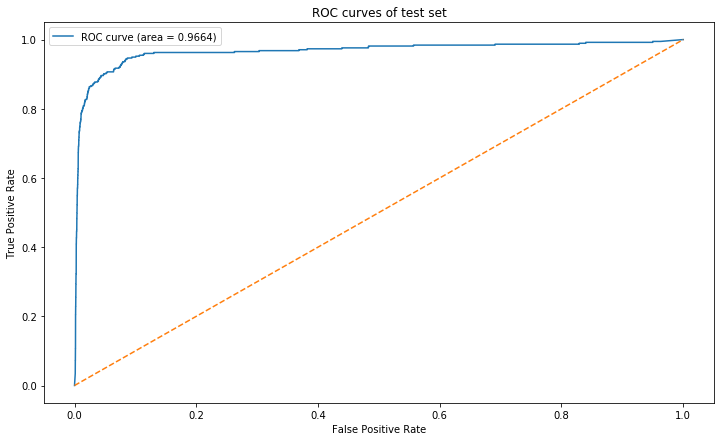

In [36]:
##############  test set #################
weka_test_path = '../data/weka_test.csv'
weka_test = weka_loader.load_file(weka_test_path)
weka_test.class_is_last()
weka_test_predict = []
weka_test_proba = []

# make prediction for each instance
for inst in weka_test:
    weka_test_predict.append(lmt.classify_instance(inst))
    weka_test_proba.append(lmt.distribution_for_instance(inst))

weka_test_predict = np.array(weka_test_predict).astype('str')
weka_test_predict[weka_test_predict == '0.0'] = 'neg'
weka_test_predict[weka_test_predict == '1.0'] = 'pos'
weka_test_proba = np.array(weka_test_proba)

cm = confusion_matrix(aps_y_test, weka_test_predict)
print("The confusion for {} set is \n{}".format('test', cm))
acc = accuracy_score(aps_y_test, weka_test_predict)
print("The classification accuracy is %0.4f" % acc)
print("The test error rate is %0.4f" %(1-acc))
fpr, tpr, thresholds = roc_curve(aps_y_test, weka_test_proba[:, 1], pos_label='pos')
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of {} set".format('test'))
plt.show()

In [37]:
jvm.stop()

### Compared with the Logistic Model Trees Model built on umbalanced data, the one built on SMOTE data has a little bit lower train and test accuracy. As is shown in the confusion matrix, It missclassify the majority ('neg') more(False Positive is 453 in SMOTE cas and False Positive is 42 in umbalacned case), but the it classify the minority('pos') more correctly (False Negative is 50 in SMOTE case and False Negative is 117 in umbalanced case). For this task, I think we care more about information from minority class and hope to correctly predict the less prominent class. Therefore, by using oversampling, we lose accuracy for targeting the majority class, but have more tendency to find out the true 'pos' class.

## ISLR 6.6.3

### (a) Steadily increase. Along with the growth of s the values of estimated coefficients will go from 0 to their OLS value. Thus, the traning RSS will steadily decrease. <br/> (b) Decrease initially, and then eventually start increasing in a U shape. Along with the growth of s, the values of estimated coefficients will gradually go non-zero. That means the the numbre of predictors increases and the model becomes more flexible. This may lead to a over-fitting situation. <br/> (c) Steadily increase. Beats are almost all zero at the beginning. There is almost no variance at the beginning stage. After the model becoming flexible, the variance will goe up. <br/> (d) Steadily decrease. Bias has a counter-tendency compare with variance as they form a trade-off. <br/>(e) Remains constant. The irreducible erro is model independent.

## ISLR, 6.6.5

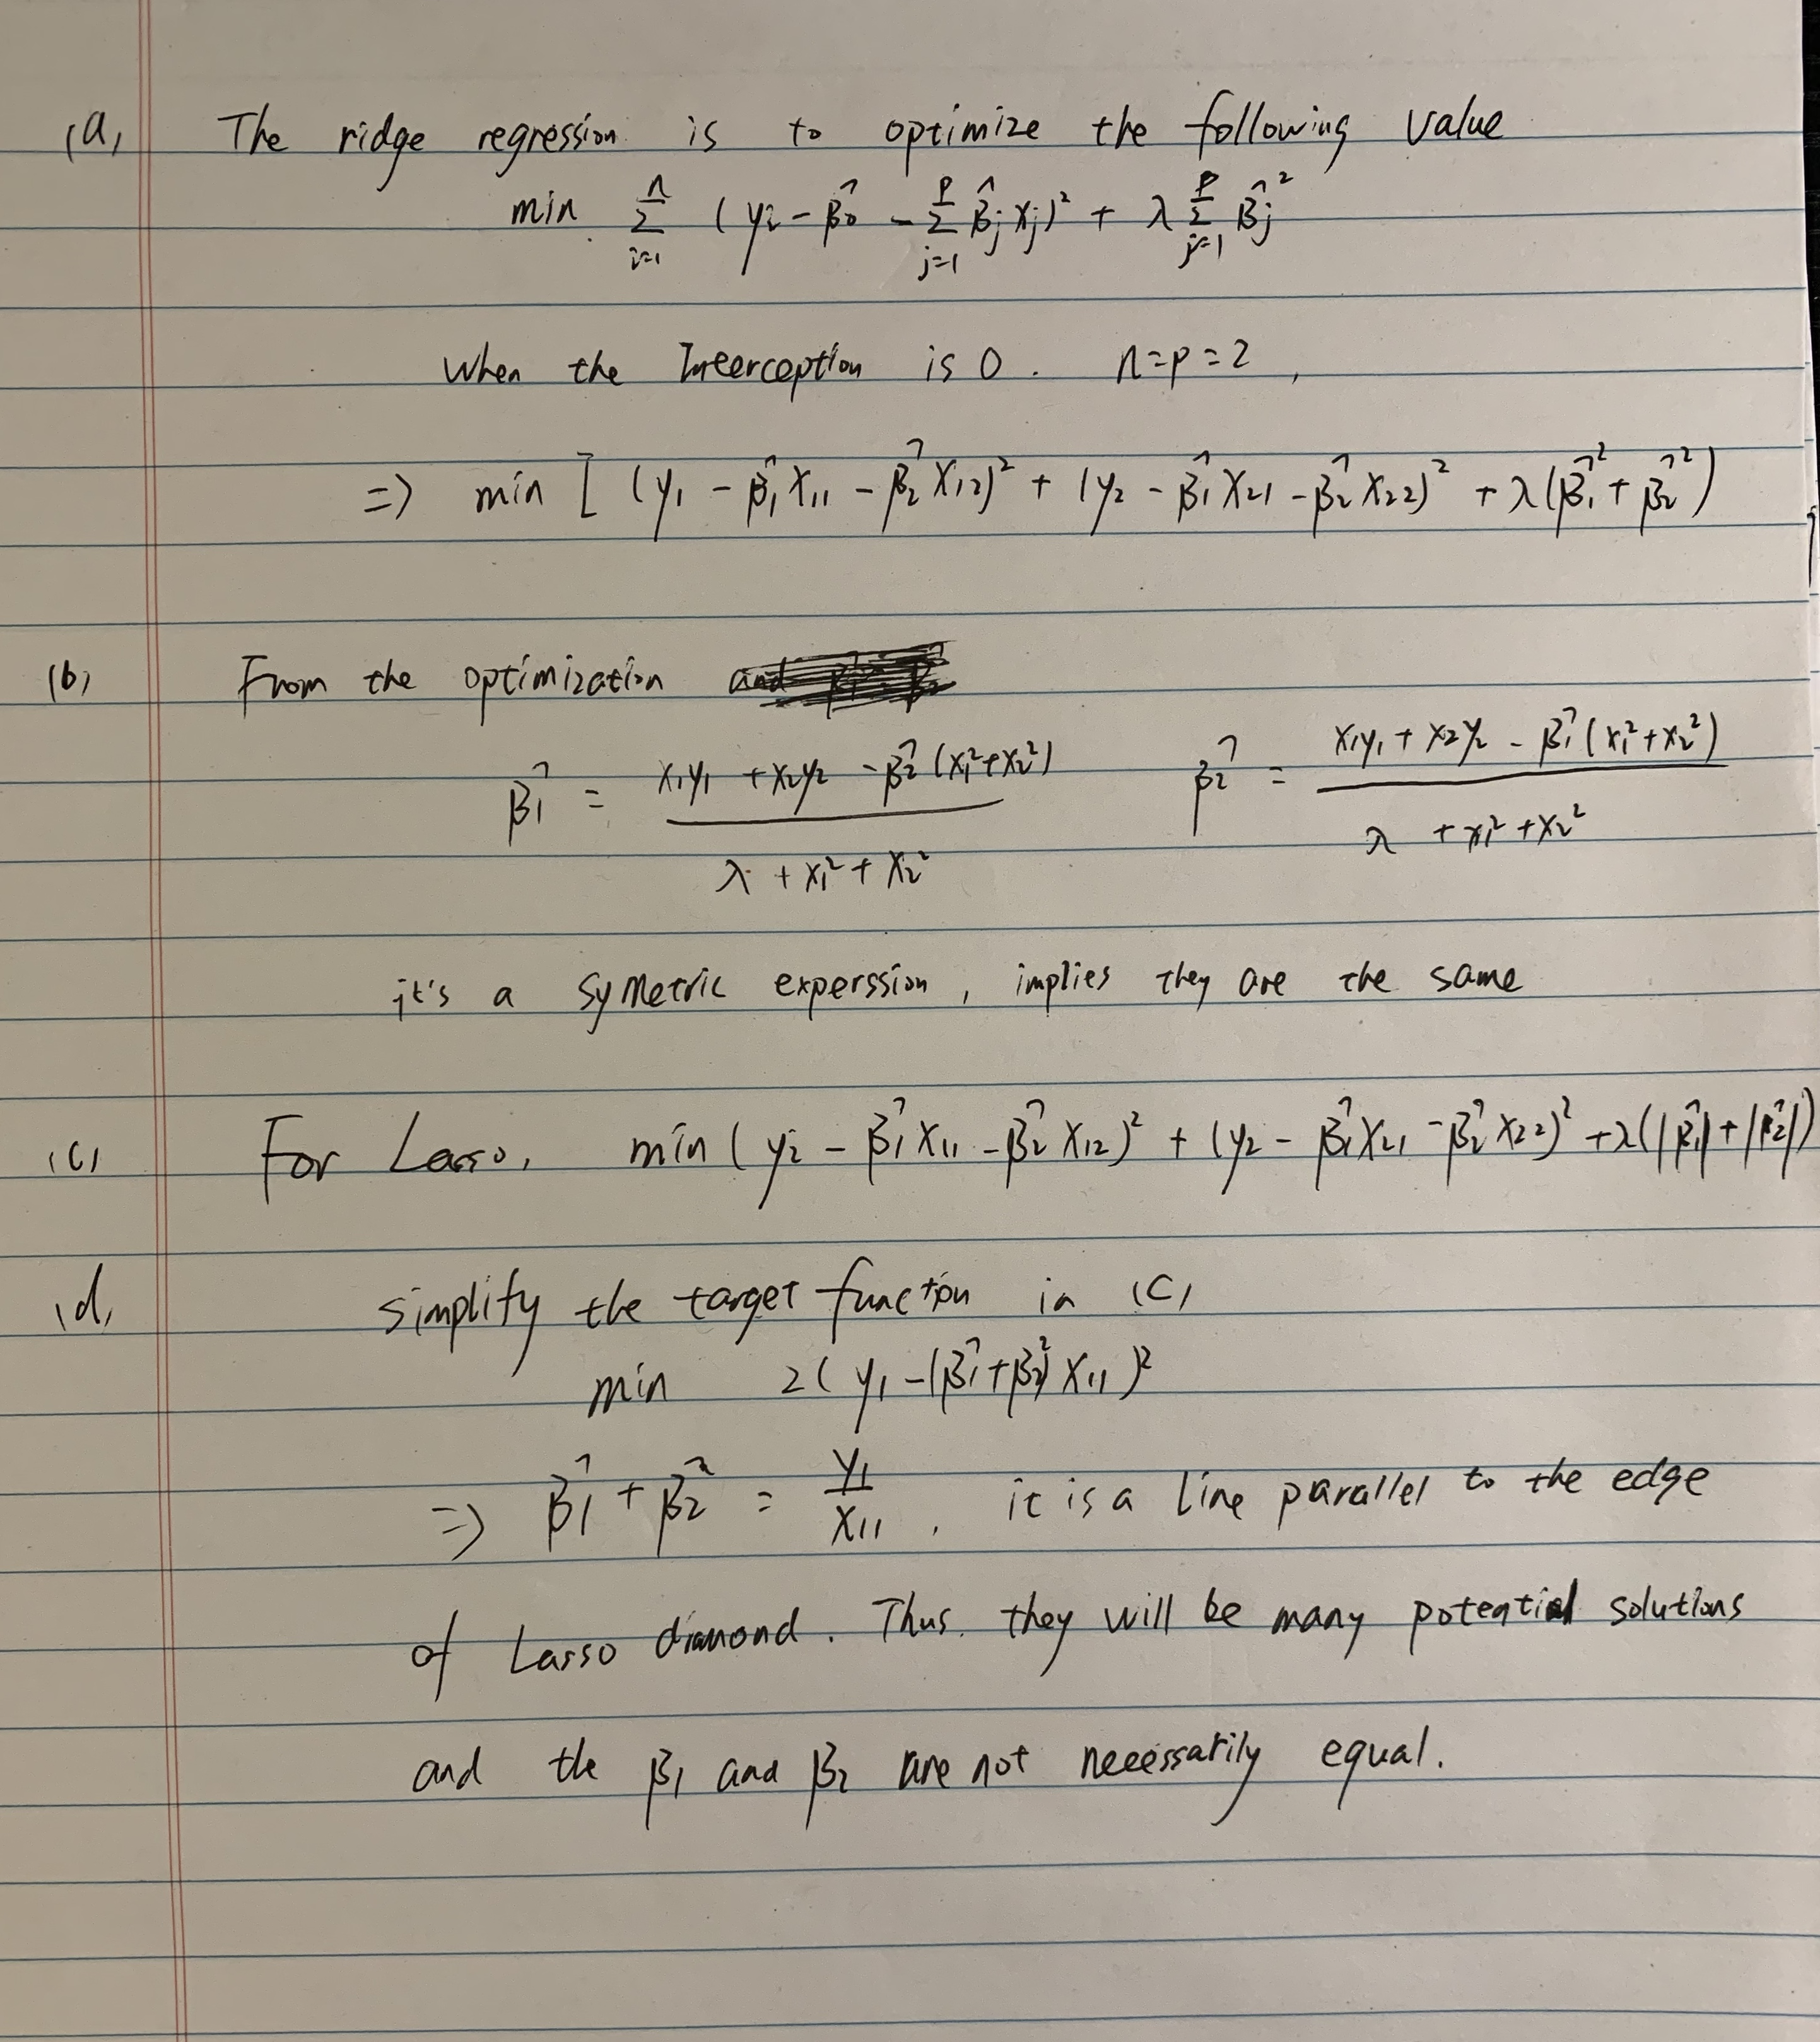

In [42]:
Image('6.6.5.jpg')

## ISLR 8.4.5

### For the majority polling, red samples has a larger number than grean samples. Thus, the result will be red. For the average probability method, averagate P(Class is Red|X) = 0.45,it will lead to a prediction of green.

## ISLR 9.7.3

In [38]:
sample_dict = {'X1' : [3, 2, 4, 1, 2, 4, 4], 
           'X2' : [4, 2, 4, 4, 1, 3, 1], 
           'Y' : ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']}
sample_df = pd.DataFrame.from_dict(sample_dict)

In [40]:
# svm model
clf = SVC(kernel='linear', C=10000)
clf.fit(sample_df.iloc[:, :-1], sample_df.iloc[:, -1])

SVC(C=10000, kernel='linear')

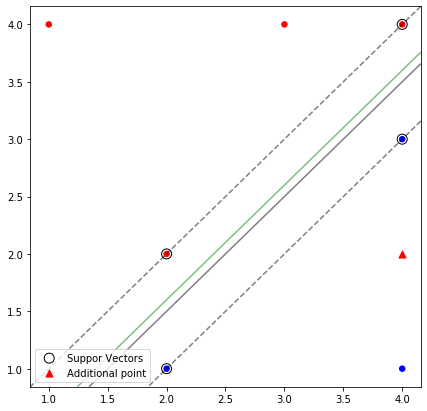

[0.99970703] [[-1.99941406  1.99941406]]


In [41]:
fig, ax = plt.subplots(figsize=(7, 7))

# scatter plot of sample points
ax.scatter(sample_df.iloc[:, 0], sample_df.iloc[:, 1], 
           c=sample_df.iloc[:, -1], s=30, 
           cmap=plt.cm.Paired)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# hyperplane
lines1 = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], label="Decision Boundary")

# support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label="Suppor Vectors")

lines2 = ax.contour(XX, YY, Z - 0.2, colors='g', levels=[0], alpha=0.5,
           linestyles=['-'])

# point make the data NOT linear-separable
ax.scatter([4.0], [2.0], color='r', marker='^', s=50, label="Additional point")

ax.legend()
plt.show()

print(clf.intercept_, clf.coef_)

## (b) The solid black lines is the hyperplane. <br/>(c) We can see, the parameters are approximately β0 = 1,β1= -2,β2 = 2β0 + β1X1 + β2X2 > 0 if >0 red, otherwise, blue <br/>(d)The dash lines indicates the maximal margin <br/>(e) The circeled ones are support vectors. <br/>(f) The seventh point is far away from the maximal margin hyperplane. If it is on the edge of decision boundary, it will have effects but it does not. <br/>(g) The solid green line. <br/>(h) The new point marked as red triangle. This make the points form an XOR pattern which is not linear-separable.